In [2]:
import healpix_util as hu
import astropy as ap
import math, sys, time
import numpy as np
from astropy.io import fits
from astropy.table import Table
from astropy.table import vstack
import astropy.io.ascii as ascii
from astropy.constants import c
import matplotlib.pyplot as plt
import math
import scipy.special as sp
from scipy import integrate
from astropy.stats import bayesian_blocks
from astropy.stats import histogram
from astropy.visualization import hist
%matplotlib inline

In [46]:
#Read sorted redshift, RA, DEC values of each quasar/AGN
hmqdat=ascii.read("./hmqdata_sorted_full.csv")
hmqdat

Z,RA,DEC
float64,float64,float64
-0.002,178.951691,61.598303
-0.001,143.52779,39.44227
-0.001,217.269221,12.069508
0.0,2.266393,6.472577
0.0,7.306389,-28.213611
0.0,10.10375,-23.666889
0.0,17.522778,-31.037222
0.0,25.4575,-31.127222
0.0,44.530278,20.500556


In [6]:
#Creating output file 
findpair = open("./output/findpair.dat",'w')
# We intend to obtain average redshift of the pair and deltaZ deltatheta Zdeltatheta values first essentially finding right pairs
findpair.write("Z\t deltaZ\t deltatheta\t Zdeltatheta\n")
#Algorithm keeps removing rows after done finding quasars within deltaZ˜0.02 
start_time=time.time()
while len(hmqdat['Z'])>0:
    j=1
    while hmqdat[j]['Z']<=(hmqdat[0]['Z']+0.02):
        deltaZ=abs(hmqdat[j]['Z']-hmqdat[0]['Z'])
        Z=(hmqdat[j]['Z']+hmqdat[0]['Z'])/2.0
        RA1=hmqdat[0]['RA']*math.pi/180.0
        RA2=hmqdat[j]['RA']*math.pi/180.0
        DEC1=hmqdat[0]['DEC']*math.pi/180.0
        DEC2=hmqdat[j]['DEC']*math.pi/180.0
        deltatheta=abs(math.acos(math.sin(DEC1)*math.sin(DEC2)+math.cos(DEC1)*math.cos(DEC2)*math.cos(RA1-RA2)))
        Zdeltatheta=Z*deltatheta
        if Zdeltatheta<=0.02:
            findpair.write("%f\t %f\t %f\t %f\n" %(Z, deltaZ, deltatheta, Zdeltatheta))
        j=j+1
    hmqdat.remove_row(0)
findpair.close()
print "Total time taken to run: "
print time.time()-start_time

IndexError: index 1 out of range for table with length 1

In [ ]:
#Creating output file 
Ralpha = open("./output/Ralpha.dat",'w')
# We intend to obtain average redshift of the pair and deltaZ deltatheta Zdeltatheta R alpha values
Ralpha.write("Z\t deltaZ\t deltatheta\t Zdeltatheta\t R\t alpha\t \n")
#Algorithm keeps removing rows after done finding quasars within deltaZ˜0.02 
start_time=time.time()
while len(hmqdat['Z'])>0:
    j=1
    while hmqdat[j]['Z']<=(hmqdat[0]['Z']+0.02):
        deltaZ=abs(hmqdat[j]['Z']-hmqdat[0]['Z'])
        Z=(Z1+Z2)/2.0
        RA1=hmqdat[0]['RA']*math.pi/180.0
        RA2=hmqdat[j]['RA']*math.pi/180.0
        DEC1=hmqdat[0]['DEC']*math.pi/180.0
        DEC2=hmqdat[j]['DEC']*math.pi/180.0
        deltatheta=abs(math.acos(math.sin(DEC1)*math.sin(DEC2)+math.cos(DEC1)*math.cos(DEC2)*math.cos(RA1-RA2)))
        Zdeltatheta=Z*deltatheta
            if Zdeltatheta<=0.02:
                R=math.sqrt(deltaZ**2+Zdeltatheta**2)
                alpha=math.acos(deltaZ/R)
                Ralpha.write("%f\t %f\t %f\t %f\t %f\t %f\n" %(Z, deltaZ, deltatheta, Zdeltatheta, R, alpha))
        j=j+1
    hmqdat.remove_row(0)
Ralpha.close()
print "Total time taken to run: "
print time.time()-start_time

In [7]:
j

1

In [8]:
hmqdat

Z,RA,DEC
float64,float64,float64
7.085,170.006167,6.690083


In [9]:
pairdat=ascii.read("./output/findpair.dat")

In [10]:
pairdat

Z,deltaZ,deltatheta,Zdeltatheta
float64,float64,float64,float64
-0.0015,0.001,0.539116,-0.000809
-0.0015,0.001,0.989785,-0.001485
-0.001,0.002,1.952679,-0.001953
-0.001,0.002,2.550885,-0.002551
-0.001,0.002,2.466295,-0.002466
-0.001,0.002,2.567833,-0.002568
-0.001,0.002,2.530615,-0.002531
-0.001,0.002,1.574572,-0.001575
-0.001,0.002,2.372919,-0.002373


In [19]:
pairdat.sort('Z')

In [16]:
pairdats=pairdat

In [17]:
pairdats

Z,deltaZ,deltatheta,Zdeltatheta
float64,float64,float64,float64
-0.0015,0.001,0.539116,-0.000809
-0.0015,0.001,0.989785,-0.001485
-0.001,0.002,0.524223,-0.000524
-0.001,0.002,0.729136,-0.000729
-0.001,0.002,1.205034,-0.001205
-0.001,0.002,0.938176,-0.000938
-0.001,0.002,1.216635,-0.001217
-0.001,0.002,0.992697,-0.000993
-0.001,0.002,0.769144,-0.000769


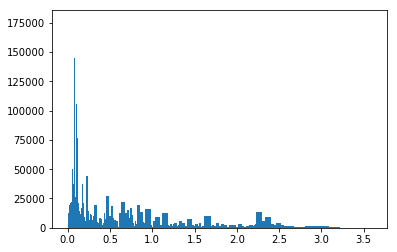

In [22]:
 pair_blocks=hist(pairdats['Z'],bins='blocks')

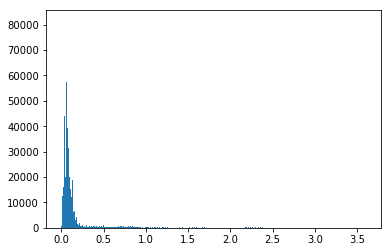

In [21]:
pairs_knuth=hist(pairdats['Z'],bins='knuth')

In [23]:
def AutoCorrelation(x):
    #x = np.asarray(x)
    y = x-x.mean()
    result = np.correlate(y, y, mode='full')
    result = result[len(result)//2:]
    result /= result[0]
    return result 

In [24]:
DD=AutoCorrelation(pairs_knuth[0])

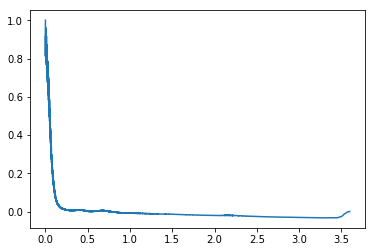

In [26]:
plt.plot(pairs_knuth[1][1:len(pairs_knuth[1])],DD)
plt.savefig("./images/DD_af_knuth.pdf")
plt.savefig("./images/DD_af_knuth.jpeg")

In [27]:
help(Table.add_column)

Help on method add_column in module astropy.table.table:

add_column(self, col, index=None, rename_duplicate=False) unbound astropy.table.table.Table method
    Add a new Column object ``col`` to the table.  If ``index``
    is supplied then insert column before ``index`` position
    in the list of columns, otherwise append column to the end
    of the list.
    
    Parameters
    ----------
    col : Column
        Column object to add.
    index : int or `None`
        Insert column before this position or at end (default)
    rename_duplicate : bool
        Uniquify column name if it already exist (default=False)
    
    Examples
    --------
    Create a table with two columns 'a' and 'b'::
    
        >>> t = Table([[1, 2, 3], [0.1, 0.2, 0.3]], names=('a', 'b'))
        >>> print(t)
         a   b
        --- ---
          1 0.1
          2 0.2
          3 0.3
    
    Create a third column 'c' and append it to the end of the table::
    
        >>> col_c = Column(name='c', d

In [30]:
R=np.sqrt(pairdats['deltaZ']**2+(pairdats['Zdeltatheta'])**2)

In [31]:
R

0.00128606128869
0.00179004672537
0.0022292269767
0.0021520895157
0.002311934458
0.00208023630539
0.002285352415
0.0028272443826
0.00310334409638
0.0025454423944
0.00322552511666


In [34]:
Rdat=pairdats.Column(name='R',data=R)
pairdats.add_column(Rdat)

In [35]:
pairdats

Z,deltaZ,deltatheta,Zdeltatheta,R
float64,float64,float64,float64,float64
-0.0015,0.001,0.539116,-0.000809,0.00128606128869
-0.0015,0.001,0.989785,-0.001485,0.00179004672537
-0.001,0.002,0.984608,-0.000985,0.0022292269767
-0.001,0.002,0.794663,-0.000795,0.0021520895157
-0.001,0.002,1.159759,-0.00116,0.002311934458
-0.001,0.002,0.572174,-0.000572,0.00208023630539
-0.001,0.002,1.105819,-0.001106,0.002285352415
-0.001,0.002,1.998327,-0.001998,0.0028272443826
-0.001,0.002,2.372919,-0.002373,0.00310334409638


In [36]:
alpha=np.arccos(pairdats['deltaZ']/pairdats['R'])

/Users/rohin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


In [37]:
alpha

0.680007633186
0.978045564681
0.457471875897
0.378203831404
0.525493621222
0.278644209975
0.505074247406
0.784979738416
0.870471520917
0.666940281126
0.901984698482


In [38]:
alphadat=pairdats.Column(name='alpha',data=alpha)
pairdats.add_column(alphadat)

In [39]:
pairdats

Z,deltaZ,deltatheta,Zdeltatheta,R,alpha
float64,float64,float64,float64,float64,float64
-0.0015,0.001,0.539116,-0.000809,0.00128606128869,0.680007633186
-0.0015,0.001,0.989785,-0.001485,0.00179004672537,0.978045564681
-0.001,0.002,0.984608,-0.000985,0.0022292269767,0.457471875897
-0.001,0.002,0.794663,-0.000795,0.0021520895157,0.378203831404
-0.001,0.002,1.159759,-0.00116,0.002311934458,0.525493621222
-0.001,0.002,0.572174,-0.000572,0.00208023630539,0.278644209975
-0.001,0.002,1.105819,-0.001106,0.002285352415,0.505074247406
-0.001,0.002,1.998327,-0.001998,0.0028272443826,0.784979738416
-0.001,0.002,2.372919,-0.002373,0.00310334409638,0.870471520917


In [43]:
om=0.3
ol=0.7
xLCDM=1.0/np.sqrt(om*(1+pairdats['Z'])**3+ol)

In [44]:
xLCDM

1.00067467016
1.00067467016
1.00044985352
1.00044985352
1.00044985352
1.00044985352
1.00044985352
1.00044985352
1.00044985352
1.00044985352
1.00044985352


In [42]:
xLCDMdat=pairdats.Column(name='xLCDM',data=xLCDM)
pairdats.add_column(xLCDMdat)
pairdats

Z,deltaZ,deltatheta,Zdeltatheta,R,alpha,xLCDM
float64,float64,float64,float64,float64,float64,float64
-0.0015,0.001,0.539116,-0.000809,0.00128606128869,0.680007633186,1.00067467016
-0.0015,0.001,0.989785,-0.001485,0.00179004672537,0.978045564681,1.00067467016
-0.001,0.002,0.984608,-0.000985,0.0022292269767,0.457471875897,1.00044985352
-0.001,0.002,0.794663,-0.000795,0.0021520895157,0.378203831404,1.00044985352
-0.001,0.002,1.159759,-0.00116,0.002311934458,0.525493621222,1.00044985352
-0.001,0.002,0.572174,-0.000572,0.00208023630539,0.278644209975,1.00044985352
-0.001,0.002,1.105819,-0.001106,0.002285352415,0.505074247406,1.00044985352
-0.001,0.002,1.998327,-0.001998,0.0028272443826,0.784979738416,1.00044985352
-0.001,0.002,2.372919,-0.002373,0.00310334409638,0.870471520917,1.00044985352


In [93]:
yLCDM0=np.sqrt(om*(1+pairdats['Z'])**3+ol)/pairdats['Z']

/Users/rohin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


In [94]:
yLCDM0

-666.217189807
-666.217189807
-999.550348757
-999.550348757
-999.550348757
-999.550348757
-999.550348757
-999.550348757
-999.550348757
-999.550348757
-999.550348757


In [95]:
LCDMf = lambda x: 1.0/math.sqrt(om*(1+x)**3+ol)
np.vectorize(LCDMf)

def LCDMfint(z):
    return integrate.quad(LCDMf, 0, z)

LCDMfint=np.vectorize(LCDMfint)

yLCDM=yLCDM0*LCDMfint(pairdats['Z'])[0]

/Users/rohin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in multiply


In [96]:
yLCDM

0.999662947356
0.999662947356
0.9997751988
0.9997751988
0.9997751988
0.9997751988
0.9997751988
0.9997751988
0.9997751988
0.9997751988
0.9997751988


/Users/rohin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/rohin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


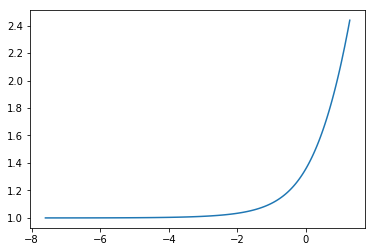

In [98]:
plt.plot(np.log(pairdats['Z']),yLCDM)

In [99]:
yLCDMdat=pairdats.Column(name='yLCDM',data=yLCDM)
pairdats.add_column(yLCDMdat)
pairdats

Z,deltaZ,deltatheta,Zdeltatheta,R,alpha,xLCDM,yLCDM
float64,float64,float64,float64,float64,float64,float64,float64
-0.0015,0.001,0.539116,-0.000809,0.00128606128869,0.680007633186,1.00067467016,0.999662947356
-0.0015,0.001,0.989785,-0.001485,0.00179004672537,0.978045564681,1.00067467016,0.999662947356
-0.001,0.002,0.984608,-0.000985,0.0022292269767,0.457471875897,1.00044985352,0.9997751988
-0.001,0.002,0.794663,-0.000795,0.0021520895157,0.378203831404,1.00044985352,0.9997751988
-0.001,0.002,1.159759,-0.00116,0.002311934458,0.525493621222,1.00044985352,0.9997751988
-0.001,0.002,0.572174,-0.000572,0.00208023630539,0.278644209975,1.00044985352,0.9997751988
-0.001,0.002,1.105819,-0.001106,0.002285352415,0.505074247406,1.00044985352,0.9997751988
-0.001,0.002,1.998327,-0.001998,0.0028272443826,0.784979738416,1.00044985352,0.9997751988
-0.001,0.002,2.372919,-0.002373,0.00310334409638,0.870471520917,1.00044985352,0.9997751988


In [100]:
sLCDM=pairdats['xLCDM']*np.sqrt((pairdats['deltaZ'])**2+(pairdats['yLCDM']*pairdats['Zdeltatheta'])**2)

In [101]:
sLCDMdat=pairdats.Column(name='sLCDM',data=sLCDM)
pairdats.add_column(sLCDMdat)
pairdats

Z,deltaZ,deltatheta,Zdeltatheta,R,alpha,xLCDM,yLCDM,sLCDM
float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.0015,0.001,0.539116,-0.000809,0.00128606128869,0.680007633186,1.00067467016,0.999662947356,0.0012869625095
-0.0015,0.001,0.989785,-0.001485,0.00179004672537,0.978045564681,1.00067467016,0.999662947356,0.00179110666594
-0.001,0.002,0.984608,-0.000985,0.0022292269767,0.457471875897,1.00044985352,0.9997751988,0.0022303051794
-0.001,0.002,0.794663,-0.000795,0.0021520895157,0.378203831404,1.00044985352,0.9997751988,0.00215311611837
-0.001,0.002,1.159759,-0.00116,0.002311934458,0.525493621222,1.00044985352,0.9997751988,0.00231296456834
-0.001,0.002,0.572174,-0.000572,0.00208023630539,0.278644209975,1.00044985352,0.9997751988,0.00208108886284
-0.001,0.002,1.105819,-0.001106,0.002285352415,0.505074247406,1.00044985352,0.9997751988,0.00228634775052
-0.001,0.002,1.998327,-0.001998,0.0028272443826,0.784979738416,1.00044985352,0.9997751988,0.00282796744178
-0.001,0.002,2.372919,-0.002373,0.00310334409638,0.870471520917,1.00044985352,0.9997751988,0.00310439404409


In [104]:
ascii.write(pairdats,"./output/sLCDM_correl.dat")

In [105]:
pairdats

Z,deltaZ,deltatheta,Zdeltatheta,R,alpha,xLCDM,yLCDM,sLCDM
float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.0015,0.001,0.539116,-0.000809,0.00128606128869,0.680007633186,1.00067467016,0.999662947356,0.0012869625095
-0.0015,0.001,0.989785,-0.001485,0.00179004672537,0.978045564681,1.00067467016,0.999662947356,0.00179110666594
-0.001,0.002,0.984608,-0.000985,0.0022292269767,0.457471875897,1.00044985352,0.9997751988,0.0022303051794
-0.001,0.002,0.794663,-0.000795,0.0021520895157,0.378203831404,1.00044985352,0.9997751988,0.00215311611837
-0.001,0.002,1.159759,-0.00116,0.002311934458,0.525493621222,1.00044985352,0.9997751988,0.00231296456834
-0.001,0.002,0.572174,-0.000572,0.00208023630539,0.278644209975,1.00044985352,0.9997751988,0.00208108886284
-0.001,0.002,1.105819,-0.001106,0.002285352415,0.505074247406,1.00044985352,0.9997751988,0.00228634775052
-0.001,0.002,1.998327,-0.001998,0.0028272443826,0.784979738416,1.00044985352,0.9997751988,0.00282796744178
-0.001,0.002,2.372919,-0.002373,0.00310334409638,0.870471520917,1.00044985352,0.9997751988,0.00310439404409


In [ ]:
spairs_knuth=hist(pairdats['sLCDM'][2253:len(pairdats['sLCDM']-1)],bins='knuth')
spairs_blocks=hist(pairdats['sLCDM'][2253:len(pairdats['sLCDM']-1)],bins='blocks')
DDsk=AutoCorrelation(spairs_knuth[0])
DDsb=AutoCorrelation(spairs_blocks[0])
plt.plot(spairs_knuth[1][1:len(spairs_knuth[1])],DDsk)
plt.savefig("./images/DD_sLCDM_knuth.pdf")
plt.savefig("./images/DD_sLCDM_knuth.jpeg")
plt.plot(spairs_blocks[1][1:len(spairs_blocks[1])],DDsb)
plt.savefig("./images/DD_sLCDM_blocks.pdf")
plt.savefig("./images/DD_sLCDM_blocks.jpeg")

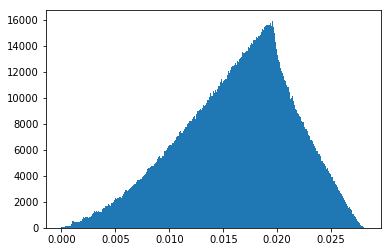

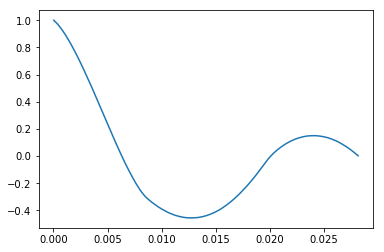

In [129]:
spairs_1000=hist(sLCDM[2253:len(sLCDM)-1],bins=1000)
plt.savefig("./images/hist_sLCDM_1000.pdf")
plt.savefig("./images/hist_sLCDM_1000.jpeg")
DDs1000=AutoCorrelation(spairs_1000[0])
plt.figure()
plt.plot(spairs_1000[1][1:len(spairs_1000[1])],DDs1000)
plt.savefig("./images/DD_sLCDM_1000.pdf")
plt.savefig("./images/DD_sLCDM_1000.jpeg")

In [112]:
max(sLCDM)

0.028187966602223606

In [114]:
np.all(np.isfinite(sLCDM))

False

In [115]:
min(sLCDM)

9.6817160036876236e-07

In [116]:
help(np.isfinite)

Help on ufunc object:

isfinite = class ufunc(__builtin__.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use np.info().  For
 |  example, np.info(np.sin).  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the "ufuncs.rst"
 |  file in the NumPy reference guide.
 |  
 |  Unary ufuncs:
 |  =============
 |  
 |  op(X, out=None)
 |  Apply op to X elementwise
 |  
 |  Parameters
 |  ----------
 |  X : array_like
 |      Input array.
 |  out : array_like
 |      An array to store the output. Must be the same shape as `X`.
 |  
 |  Returns
 |  -------
 |  r : array_like
 |      `r` will have the same shape as `X`; if out is provided, `r`
 |      will be equal to out.
 |  
 |  Binary ufuncs:
 |  ==============
 |  
 |  op(

In [117]:
np.argwhere(np.isnan(sLCDM))

array([[ 206],
       [ 207],
       [ 208],
       ..., 
       [2250],
       [2251],
       [2252]])

In [119]:
sLCDM[2252]

nan

In [121]:
pairdats['Z'][2252]

0.0

In [ ]:
spairs1000=spairs_knuth

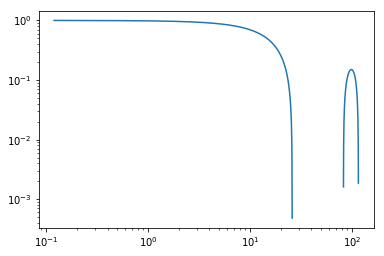

In [134]:
plt.figure()
plt.loglog(4.1e3*spairs_1000[1][1:len(spairs_1000[1])],DDs1000)
plt.savefig("./images/DD_sLCDMlog_1000.pdf")
plt.savefig("./images/DD_sLCDMlog_1000.jpeg")

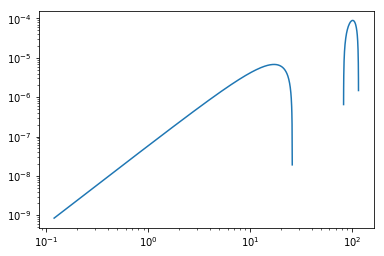

In [135]:
plt.figure()
plt.loglog(4.1e3*spairs_1000[1][1:len(spairs_1000[1])],spairs_1000[1][1:len(spairs_1000[1])]**2*DDs1000)
plt.savefig("./images/DD_sLCDMlog_1000.pdf")
plt.savefig("./images/DD_sLCDMlog_1000.jpeg")

In [48]:
help(hmqdat.MaskedColumn)


Help on class MaskedColumn in module astropy.table.column:

class MaskedColumn(Column, astropy.table._column_mixins._MaskedColumnGetitemShim, numpy.ma.core.MaskedArray)
 |  Define a masked data column for use in a Table object.
 |  
 |  Parameters
 |  ----------
 |  data : list, ndarray or None
 |      Column data values
 |  name : str
 |      Column name and key for reference within Table
 |  mask : list, ndarray or None
 |      Boolean mask for which True indicates missing or invalid data
 |  fill_value : float, int, str or None
 |      Value used when filling masked column elements
 |  dtype : numpy.dtype compatible value
 |      Data type for column
 |  shape : tuple or ()
 |      Dimensions of a single row element in the column data
 |  length : int or 0
 |      Number of row elements in column data
 |  description : str or None
 |      Full description of column
 |  unit : str or None
 |      Physical unit
 |  format : str or None or function or callable
 |      Format string for

In [54]:
np.where(hmqdat['Z']<=0.25)

(array([    0,     1,     2, ..., 37950, 37951, 37952]),)

In [55]:
np.where(hmqdat['Z']>0)

(array([    67,     68,     69, ..., 510352, 510353, 510354]),)

In [56]:
hmqbin1=hmqdat[67:37952]

In [57]:
hmqbin1

Z,RA,DEC
float64,float64,float64
0.001,11.887875,-25.288639
0.001,188.916111,12.556111
0.001,190.718333,13.257222
0.001,192.720556,41.120278
0.001,194.1825,21.683056
0.001,197.94599,-0.289915
0.001,201.365583,-43.018806
0.001,202.468333,47.194722
0.001,202.589682,44.688984


In [58]:
ascii.write(hmqbin1,"./output/hmqbin1.dat")

In [59]:
len(hmqbin1)

37885

In [60]:
randra,randdec=hu.randsphere(37885)
randz=0.25*np.random.random_sample(37885)

In [61]:
randz

array([ 0.09055629,  0.17966635,  0.19842346, ...,  0.00283044,
        0.14986337,  0.1608593 ])

In [62]:
randra

array([  82.83397398,   16.6656554 ,  165.51338515, ...,  115.29707449,
        191.65893917,  258.64839955])

In [63]:
randdec

array([-31.4041433 , -32.79569862,  22.5723584 , ..., -28.97524559,
        77.49756571, -28.649747  ])

In [64]:
rdat = Table([randz, randra, randdec], names=('Z', 'RA', 'DEC'))

In [65]:
ascii.write(rdat,"./input/rdatf.dat")

In [66]:
rdat

Z,RA,DEC
float64,float64,float64
0.0905562947658,82.8339739799,-31.4041432973
0.179666350201,16.6656554042,-32.7956986173
0.198423456837,165.513385154,22.5723583964
0.02699457476,49.8786430626,-47.9838130232
0.249567027275,189.926592265,-14.1726643577
0.208053638534,10.1352114864,-63.9908692299
0.123940268516,347.577168388,-46.005290915
0.0208993081512,321.130083571,-49.7373804336
0.0597156114309,330.077367328,18.4620279676


In [67]:
rdat.sort('Z')

In [69]:
ascii.write(rdat,"./input/rdatf.dat",overwrite=True)

In [68]:
rdat

Z,RA,DEC
float64,float64,float64
4.79121475247e-06,72.3773734035,20.0512320354
5.16724118113e-06,308.925925565,-8.31255335055
1.89522769875e-05,173.013645184,-29.9838208208
1.92138087725e-05,18.9977785484,20.678293975
2.57349485492e-05,152.52111193,5.2451365534
2.63532549121e-05,73.5153402636,24.7532901221
3.06301354178e-05,120.893419183,-13.7621959652
3.32600533562e-05,322.550417593,60.4296693751
4.31786092999e-05,146.01388324,-35.8467792924


In [78]:
#Creating output file 
ddpair = open("./output/ddbin1pair.dat",'w')
# We intend to obtain average redshift of the pair and deltaZ deltatheta Zdeltatheta values first essentially finding right pairs
ddpair.write("Z\t deltaZ\t deltatheta\t Zdeltatheta\n")
#Algorithm keeps removing rows after done finding quasars within deltaZ˜0.02 
start_time=time.time()
while len(hmqbin1['Z'])>1:
    j=1
    while hmqbin1[j]['Z']<=(hmqbin1[0]['Z']+0.05):
        deltaZ=abs(hmqbin1[j]['Z']-hmqbin1[0]['Z'])
        Z=(hmqbin1[j]['Z']+hmqbin1[0]['Z'])/2.0
        RA1=hmqbin1[0]['RA']*math.pi/180.0
        RA2=hmqbin1[j]['RA']*math.pi/180.0
        DEC1=hmqbin1[0]['DEC']*math.pi/180.0
        DEC2=hmqbin1[j]['DEC']*math.pi/180.0
        deltatheta=abs(math.acos(math.sin(DEC1)*math.sin(DEC2)+math.cos(DEC1)*math.cos(DEC2)*math.cos(RA1-RA2)))
        Zdeltatheta=Z*deltatheta
        if Zdeltatheta<=0.05:
            ddpair.write("%f\t %f\t %f\t %f\n" %(Z, deltaZ, deltatheta, Zdeltatheta))
        j=j+1
    hmqbin1.remove_row(0)
ddpair.close()
print "Total time taken to run: "
print time.time()-start_time

IndexError: index 5744 out of range for table with length 5744

In [79]:
hmqbin1

Z,RA,DEC
float64,float64,float64
0.2,0.101708,-12.763306
0.2,0.455402,3.95228
0.2,7.841667,30.267222
0.2,7.904592,-18.724134
0.2,8.593798,2.777765
0.2,9.399029,0.219421
0.2,9.805841,-2.951965
0.2,10.857645,0.65956
0.2,11.359589,-3.652243


In [70]:
from astropy.table import vstack

In [74]:
rdraw=vstack([hmqbin1,rdat])

In [76]:
rdraw.sort('Z')

In [77]:
rdraw

Z,RA,DEC
float64,float64,float64
4.79121475247e-06,72.3773734035,20.0512320354
5.16724118113e-06,308.925925565,-8.31255335055
1.89522769875e-05,173.013645184,-29.9838208208
1.92138087725e-05,18.9977785484,20.678293975
2.57349485492e-05,152.52111193,5.2451365534
2.63532549121e-05,73.5153402636,24.7532901221
3.06301354178e-05,120.893419183,-13.7621959652
3.32600533562e-05,322.550417593,60.4296693751
4.31786092999e-05,146.01388324,-35.8467792924


In [80]:
hmqdat1=ascii.read("./output/hmqbin1.dat")

In [81]:
#Creating output file 
rdpair = open("./output/rdbin1pair.dat",'w')
# We intend to obtain average redshift of the pair and deltaZ deltatheta Zdeltatheta values first essentially finding right pairs
rdpair.write("Z\t deltaZ\t deltatheta\t Zdeltatheta\n")
#Algorithm keeps removing rows after done finding quasars within deltaZ˜0.02 
start_time=time.time()
while len(hmqdat1['Z'])>1:
    #j=0
    for j in range(0,len(rdat['Z'])):
        if rdat[j]['Z']<=(hmqdat1[0]['Z']+0.05):
            deltaZ=abs(rdat[j]['Z']-hmqdat1[0]['Z'])
            Z=(rdat[j]['Z']+hmqdat1[0]['Z'])/2.0
            RA1=hmqdat1[0]['RA']*math.pi/180.0
            RA2=rdat[j]['RA']*math.pi/180.0
            DEC1=hmqdat1[0]['DEC']*math.pi/180.0
            DEC2=rdat[j]['DEC']*math.pi/180.0
            deltatheta=abs(math.acos(math.sin(DEC1)*math.sin(DEC2)+math.cos(DEC1)*math.cos(DEC2)*math.cos(RA1-RA2)))
            Zdeltatheta=Z*deltatheta
            if Zdeltatheta<=0.05:
                rdpair.write("%f\t %f\t %f\t %f\n" %(Z, deltaZ, deltatheta, Zdeltatheta))
        #j=j+1
    hmqdat1.remove_row(0)
rdpair.close()
print "Total time taken to run: "
print time.time()-start_time

Total time taken to run: 
150745.856852


In [ ]:
#Creating output file 
rrpair = open("./output/rrbin1pair.dat",'w')
# We intend to obtain average redshift of the pair and deltaZ deltatheta Zdeltatheta values first essentially finding right pairs
rrpair.write("Z\t deltaZ\t deltatheta\t Zdeltatheta\n")
#Algorithm keeps removing rows after done finding quasars within deltaZ˜0.02 
start_time=time.time()
while len(rdat['Z'])>1:
    j=1
    while rdat[j]['Z']<=(rdat[0]['Z']+0.05):
        deltaZ=abs(rdat[j]['Z']-rdat[0]['Z'])
        Z=(rdat[j]['Z']+rdat[0]['Z'])/2.0
        RA1=rdat[0]['RA']*math.pi/180.0
        RA2=rdat[j]['RA']*math.pi/180.0
        DEC1=rdat[0]['DEC']*math.pi/180.0
        DEC2=rdat[j]['DEC']*math.pi/180.0
        deltatheta=abs(math.acos(math.sin(DEC1)*math.sin(DEC2)+math.cos(DEC1)*math.cos(DEC2)*math.cos(RA1-RA2)))
        Zdeltatheta=Z*deltatheta
        if Zdeltatheta<=0.05:
            rrpair.write("%f\t %f\t %f\t %f\n" %(Z, deltaZ, deltatheta, Zdeltatheta))
        j=j+1
    rdat.remove_row(0)
rrpair.close()
print "Total time taken to run: "
print time.time()-start_time